#**Task 1: Text Classification**



## Step 1: Download the data (Task 1.1)


In [ ]:
# Mount a drive
from google.colab import drive

# drive.mount("/content/gdrive")

### Download the Drug Dataset



In [ ]:
# Upload the Drug data set as the drug200.csv file
import pandas as pd
from google.colab import files

drug_dataset = files.upload()

# check proper upload
pd.read_csv("drug200.csv")

### Download the BBC Dataset

In [ ]:
# Upload the BBC data set as the zip file
import pandas as pd
import os
from google.colab import files

bbc_zipped = files.upload()

!unzip \*.zip  && rm *.zip

bbc_dataset = os.listdir('BBC')

## Step 2 Load the corpus using load files and make sure you set the encoding to latin1. (Task 1.3)

### Get and group the data

In [ ]:
import sklearn.datasets
import re

def load_files_of_BBC(category=None):
    files_load = sklearn.datasets.load_files('BBC', description="""
     D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.6
     """, categories=category, encoding='latin1')
    length = len(files_load .data)
    filesnames = list(map(lambda x : x[x.rfind("/")+1:],files_load.filenames))
    return files, length
  
#all BBC data and size
allBBCFiles,allBBCDataSize = load_files_of_BBC()
\
# #BBC business Data and size
businessFiles,businessDataSize = load_files_of_BBC('business')

# #BBC entertainment Data and size
entertainmentFiles,entertainmentDataSize  = load_files_of_BBC('entertainment')

# #BBC politics Data and size
politicsFiles,politicsDataSize = load_files_of_BBC('politics')

# #BBC sport Data and size
sportFiles, sportDataSize = load_files_of_BBC('sport')

# #BBC tech Data 
techFiles,techDataSize = load_files_of_BBC('tech')

['385.txt', '160.txt', '090.txt', '074.txt', '399.txt', '398.txt', '364.txt', '155.txt', '228.txt', '093.txt', '508.txt', '020.txt', '240.txt', '003.txt', '155.txt', '448.txt', '454.txt', '040.txt', '429.txt', '153.txt', '112.txt', '275.txt', '488.txt', '310.txt', '332.txt', '447.txt', '283.txt', '149.txt', '387.txt', '492.txt', '196.txt', '424.txt', '326.txt', '257.txt', '035.txt', '054.txt', '129.txt', '317.txt', '015.txt', '359.txt', '113.txt', '026.txt', '285.txt', '125.txt', '400.txt', '230.txt', '283.txt', '462.txt', '099.txt', '108.txt', '466.txt', '061.txt', '284.txt', '385.txt', '132.txt', '165.txt', '265.txt', '363.txt', '380.txt', '311.txt', '277.txt', '481.txt', '234.txt', '135.txt', '027.txt', '207.txt', '315.txt', '136.txt', '068.txt', '120.txt', '078.txt', '232.txt', '111.txt', '416.txt', '178.txt', '062.txt', '133.txt', '156.txt', '345.txt', '011.txt', '460.txt', '037.txt', '290.txt', '077.txt', '023.txt', '228.txt', '182.txt', '192.txt', '056.txt', '444.txt', '441.txt'

## Step 3: Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf. (Task 1.2)

### Create Dataframe

In [ ]:
import pandas as pd
import numpy as np

allBBC_DF = pd.DataFrame({
    'Business':businessDataSize,
    'Entertainment':entertainmentDataSize,
    'Politics':politicsDataSize,
    'Sport':sportDataSize,
    'Tech':techDataSize
    },
    index=['Records Count']
    )

allBBC_DF

,Business,Entertainment,Politics,Sport,Tech
Records Count,510,386,417,511,401


### Plot the distribution of the instances in each class

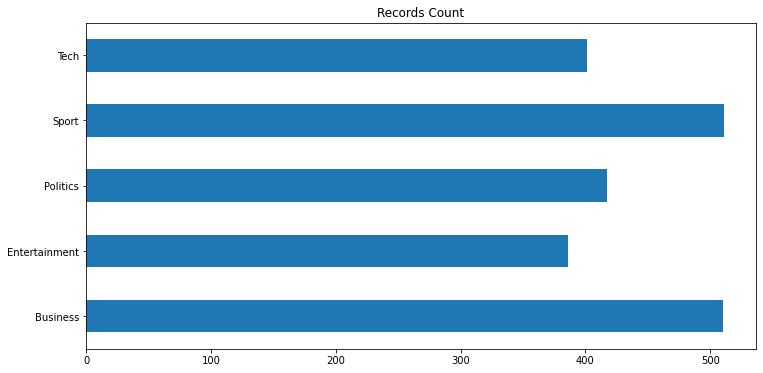

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

sp = allBBC_DF.loc['Records Count'].plot(by=allBBCData.target_names,title='Records Count',figsize=(12,6),kind='barh')

### Save the graphic in a file called BBC-distribution.pdf

In [ ]:
fig = sp.get_figure()
fig.savefig('BBC-distribution.pdf')

## Step 4: Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. (Task 1.4)

### Prepare the vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

def get_matrix_and_vocabulary(data):
  return vectorizer.fit_transform(data).toarray(), {k: v for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])}

### Extract matrices

In [ ]:
# Not sure if I'm doing things right here!
allBBCMatrix,allBBCVocab = get_matrix_and_vocabulary(allBBCFiles.data)
businessMatrix,businessVocab =  get_matrix_and_vocabulary(businessFiles.data)
entertainmentMatrix,entertainmentVocab = get_matrix_and_vocabulary(entertainmentFiles.data)
politicsMatrix,politicsVocab = get_matrix_and_vocabulary(politicsFiles.data)
sportMatrix,sportVocab= get_matrix_and_vocabulary(sportFiles.data)
techMatrix,techVocab = get_matrix_and_vocabulary(techFiles.data)

## Step 5: Split the dataset into 80% for training and 20% for testing. (Task 1.5)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(allBBCData.filenames,allBBCMatrix, test_size=0.2)

'385.txt'

## Step 6: Train a multinomial Naive Bayes Classifier on the training set using the default parameters and evaluate it on the test set. (Task 1.6)

### Prepare the MultinomialNB classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

### Train a multinomial Naive Bayes Classifier

### Evaluate the classifier on the test set



#**Task 2: Drug Classification**